# Neural Network

In [23]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
import math
import matplotlib
from pathlib import Path
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

## Using a Single Neuron for Binary Classification

### Step 1 - Import Stock and Social Media data

In [2]:
# Import stock data from .csv file
CEI_data = Path("../Resources/CEI_data.csv")
CEI_df = pd.read_csv(CEI_data, delimiter=",")
CEI_df.head()

,time,open,high,low,close,volume
0,2021-08-02 09:00:00-04:00,0.4576,0.4576,0.4566,0.4566,200
1,2021-08-02 09:15:00-04:00,0.4548,0.4548,0.4546,0.4546,200
2,2021-08-02 09:30:00-04:00,0.4514,0.4514,0.4498,0.4498,200
3,2021-08-02 09:45:00-04:00,0.4484,0.4498,0.4484,0.4498,200
4,2021-08-02 10:15:00-04:00,0.4470,0.4470,0.4470,0.4470,387


In [3]:
# Storing the date/time value
CEI_df['time'] = CEI_df['time'].str.slice(0, 16)

CEI_df.head()

,time,open,high,low,close,volume
0,2021-08-02 09:00,0.4576,0.4576,0.4566,0.4566,200
1,2021-08-02 09:15,0.4548,0.4548,0.4546,0.4546,200
2,2021-08-02 09:30,0.4514,0.4514,0.4498,0.4498,200
3,2021-08-02 09:45,0.4484,0.4498,0.4484,0.4498,200
4,2021-08-02 10:15,0.4470,0.4470,0.4470,0.4470,387


In [4]:
# Import social media data from .csv file
SM_data = Path("../reddit_resources/reddit_data.csv")
SM_df = pd.read_csv(SM_data, delimiter=",")
SM_df.head()

,title,selftext,date,score,num_comments
0,"I have no DD. It’s a cheap price, the stock ha...",NaN,2021-10-02 01:43:23+00:00,1,0
1,Who is in PED? It is an energy stock! I am in ...,\nToday it had a run. It is an energy stock. H...,2021-10-02 01:08:40+00:00,1,0
2,"WHO IS KNOWN FOR CARBON CAPTURE,OH YES. $CEI",NaN,2021-10-01 20:45:15+00:00,1,0
3,$PROG - The Next Big Short Squeeze Candidate,"Alright retards, I can't believe I happened up...",2021-10-01 19:21:32+00:00,1,0
4,CEI 100% PORT YOLO GAIN HODL TILL 10$+ then 20$,NaN,2021-10-01 18:26:46+00:00,1,0


In [5]:
# Storing the date/time value
SM_df['min'] = SM_df['date'].str.slice(14, 16).astype(int)
SM_df['min'] = 15 * (SM_df['min']/15).apply(np.round).apply(int)
SM_df['min'] = SM_df['min'].astype(str).str.zfill(2)
SM_df['time'] = SM_df['date'].str.slice(0, 14)+SM_df['min'] 

SM_df.tail()

,title,selftext,date,score,num_comments,min,time
369,CEI too the moon,100%+ returns today what do you guys think?\n\...,2018-09-24 21:10:24+00:00,1,0,15,2018-09-24 21:15
370,The cheapest thing on Robinhood currently is [...,[removed],2018-02-28 20:04:11+00:00,21,37,00,2018-02-28 20:00
371,BUY CEI U WILL 9X TIMES INCREASE UR MONEY$$$ h...,[removed],2017-11-22 16:34:32+00:00,1,0,30,2017-11-22 16:30
372,"ALERT FOR TUES, NOV 20, 2017 3 HOTTTT WALL ST....",[removed],2017-11-21 07:04:42+00:00,1,0,00,2017-11-21 07:00
373,XXII and CEI today?,Anyone hopping on or am I going to be the only...,2017-10-06 12:57:00+00:00,7,13,60,2017-10-06 12:60


In [10]:
# Merge stock and social media dataframe
df = CEI_df.merge(SM_df, left_on='time', right_on='time')
df.drop(columns=['min', 'date', 'title', 'selftext'], axis=1, inplace=True)
df.tail()

,time,open,high,low,close,volume,score,num_comments
54,2021-09-30 14:30,3.730,3.76,3.62,3.63,101133,1,3
55,2021-09-30 14:45,3.640,3.70,3.60,3.68,43571,1,1
56,2021-09-30 15:30,3.685,3.89,3.66,3.86,88756,1,1
57,2021-09-30 16:00,3.880,3.88,3.80,3.80,800,1,1
58,2021-09-30 16:30,3.730,3.84,3.71,3.73,6153,1,3


### Step 2 - Encoded Data

In [8]:
# Split target column from dataset
y = df['close']
X = df.drop(columns='close')

# Set Index
X = X.set_index('time')

# Binary encoding using Pandas (multiple columns) for Social Media Data
X = pd.get_dummies(X)

X.tail()

,open,high,low,volume,score,num_comments
time,,,,,,
2021-09-30 14:30,3.730,3.76,3.62,101133,1,3
2021-09-30 14:45,3.640,3.70,3.60,43571,1,1
2021-09-30 15:30,3.685,3.89,3.66,88756,1,1
2021-09-30 16:00,3.880,3.88,3.80,800,1,1
2021-09-30 16:30,3.730,3.84,3.71,6153,1,3


### Step 3 - Scaling Data

In [9]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Creating the scaler instance
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Step 4 - Neural Network Model Creation

#### Add the layers of Neural Network

In [108]:
# Create a sequential model
neuron = Sequential()

# First layer of Neural Network
number_inputs = 6
number_hidden_nodes = 6

neuron.add(Dense(units=number_hidden_nodes, activation="tanh", input_dim=number_inputs))

# Create the second hidden layer
# number_hidden_nodes2 = 2

# neuron.add(Dense(units=number_hidden_nodes2, activation="relu"))

# Output layer
output_nodes = 1

neuron.add(Dense(units=output_nodes, activation="tanh"))

# Model summary
neuron.summary()

## Compile model
## neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Compile the model 
# Set the parameters as mean_squared_error, adam, and mse.
neuron.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 7         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [109]:
# Fit the model
# The validation split parameter splits the data into testing and training sets.
model = neuron.fit(X, y, validation_split=0.2, epochs=800, verbose=0)

#### Evaluate the Model

<AxesSubplot:>

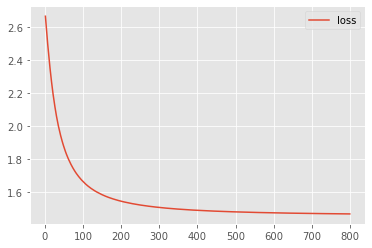

In [110]:
# Plotting the Loss Function and Accuracy
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

In [ ]:
# Plot the accuracy
df.plot(y="accuracy")

In [111]:
# Evaluate the model using the testing data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 5.0532 - mse: 5.0532
Loss: 5.05321741104126, Accuracy: 5.05321741104126


### Step 5 - Prediction

In [112]:
# Making predictions
predictions = neuron.predict(X_test_scaled)
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test.ravel()})
results.head(10)

,predictions,actual
0,0.916705,3.5050
1,-0.873551,0.7079
2,0.872782,2.5700
3,0.993651,3.8600
4,0.928472,3.1150
5,0.505415,1.9450
6,0.928472,3.1150
7,0.116068,1.6300
8,-0.826714,1.6300
9,0.967967,3.5900


In [30]:
# Plot train vs test for the deep neural net
plt.plot(neuron.history["loss"])
plt.plot(neuron.history["val_loss"])
plt.title("loss_function - 2 hidden layers - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

TypeError: 'History' object is not subscriptable

Text(0.5, 1.0, 'Stock Price Prediction')

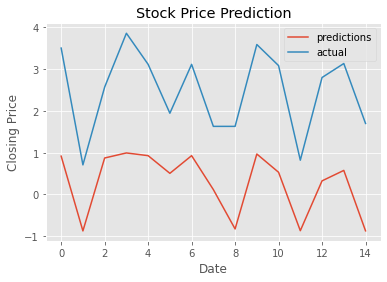

In [113]:
# Plot the CEI stock closing price Actual vs. Prediction
matplotlib.style.use('ggplot')
results.plot()
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Prediction")